In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

# import libraries
import os
import pandas as pd
import numpy as np
import pickle
from joblib import dump, load
import shap
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, precision_recall_curve, auc
from yellowbrick.classifier import PrecisionRecallCurve

# specifying constant parameters
random_seed = 5

# set working directory
working_directory = r"C:\Users\oreler\Documents\Python_Local"
os.chdir(working_directory)

# code for uploading pickled data
MR_X_train_entire = pickle.load(open("Pure_data\MR_X_train_entire.pkl", 'rb'))
MR_Y_train_entire = pickle.load(open("Pure_data\MR_Y_train_entire.pkl", 'rb'))
MR_X_test_entire = pickle.load(open("Pure_data\MR_X_test_entire.pkl", 'rb'))
MR_Y_test_entire = pickle.load(open("Pure_data\MR_Y_test_entire.pkl", 'rb'))

IR_X_train_entire = pickle.load(open("Pure_data\IR_X_train_entire.pkl", 'rb'))
IR_Y_train_entire = pickle.load(open("Pure_data\IR_Y_train_entire.pkl", 'rb'))
IR_X_test_entire = pickle.load(open("Pure_data\IR_X_test_entire.pkl", 'rb'))
IR_Y_test_entire = pickle.load(open("Pure_data\IR_Y_test_entire.pkl", 'rb'))

# select features
MR_selected_features = ['Cluster\'s latitude coordinate', 'Current age', 'Cluster\'s longitude coordinate', 'Total lifetime number of sex partners', 'Age of most recent partner', 'Wealth index factor score combined', 'Years lived in place of residence', 'Condom used during last sex with most recent partner', 'Cluster altitude in meters']

IR_selected_features = ['Cluster\'s latitude coordinate', 'Current age', 'Cluster\'s longitude coordinate', 'Total lifetime number of sex partners', 'Age of most recent partner', 'Wealth index factor score combined', 'Years lived in place of residence', 'Condom used during last sex with most recent partner', 'Cluster altitude in meters']

MR_X_train_selected = MR_X_train_entire[MR_selected_features]
IR_X_train_selected = IR_X_train_entire[IR_selected_features]
MR_X_test_selected = MR_X_test_entire[MR_selected_features]
IR_X_test_selected = IR_X_test_entire[IR_selected_features]


MR_xgb_selected = load("xgb_selected\MR_xgb_selected_9.joblib")
IR_xgb_selected = load("xgb_selected\IR_xgb_selected_9.joblib")

MR_best_index = MR_xgb_selected.best_index_
IR_best_index = IR_xgb_selected.best_index_

MR_Y_train_selected_pred = MR_xgb_selected.predict(MR_X_train_selected)
# MR_Y_train_selected_pred_thresh = (MR_xgb_selected.predict_proba(MR_X_train_selected)[:,1] >= 0.3).astype(bool) # set threshold as 0.3
IR_Y_train_selected_pred = IR_xgb_selected.predict(IR_X_train_selected)

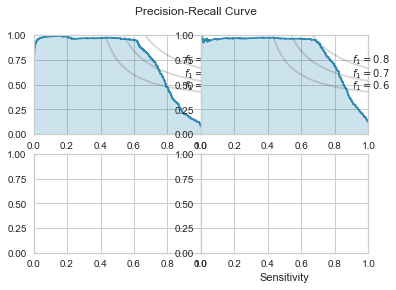

<Figure size 432x288 with 0 Axes>

In [53]:
fig, axs = plt.subplots(2, 2)

# Object oriented approach
MR_viz = PrecisionRecallCurve(MR_xgb_selected.best_estimator_, ap_score=False, iso_f1_curves=True, iso_f1_values=(0.6, 0.7, 0.8), ax=axs[0][0])
MR_viz.fit(MR_X_train_selected, MR_Y_train_entire)
MR_viz.score(MR_X_test_selected, MR_Y_test_entire)

IR_viz = PrecisionRecallCurve(IR_xgb_selected.best_estimator_, ap_score=False, iso_f1_curves=True, iso_f1_values=(0.6, 0.7, 0.8), ax=axs[0][1])
IR_viz.fit(IR_X_train_selected, IR_Y_train_entire)
IR_viz.score(IR_X_test_selected, IR_Y_test_entire)

plt.subplots_adjust(wspace=0)
plt.suptitle('Precision-Recall Curve')
#plt.title('Precision-Recall Curve for males')
#axs[0][1].title('Precision-Recall Curve for females')
plt.xlabel('Sensitivity')
#axs[0][0].ylabel('PPV')
axs[0][0].axis([0, 1, 0, 1])
axs[0][1].axis([0, 1, 0, 1])
plt.show()
plt.savefig('IR_viz_blank.png', bbox_inches='tight')

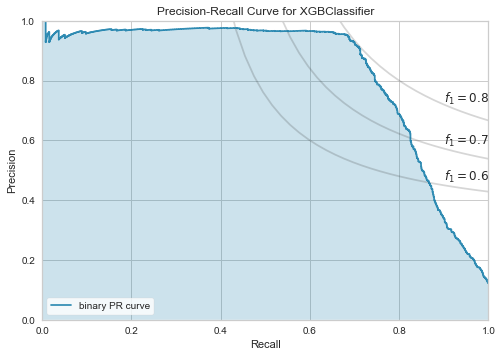

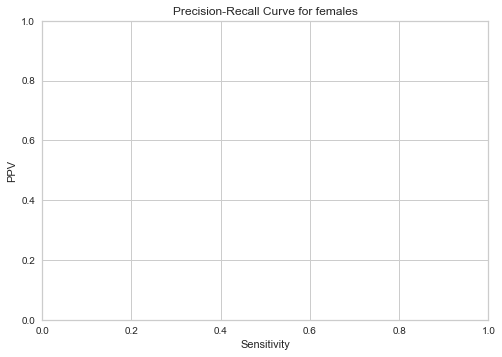

In [6]:
IR_viz = PrecisionRecallCurve(IR_xgb_selected.best_estimator_, ap_score=False, iso_f1_curves=True, iso_f1_values=(0.6, 0.7, 0.8))
IR_viz.fit(IR_X_train_selected, IR_Y_train_entire)
IR_viz.score(IR_X_test_selected, IR_Y_test_entire)
IR_viz.show()
plt.figure()

c:\users\oreler\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
c:\users\oreler\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
c:\users\oreler\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
c:\users\oreler\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
c:\users\oreler\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
c:\users\oreler\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
c:\users\oreler\appdata\local\programs\python\python37\lib\site-

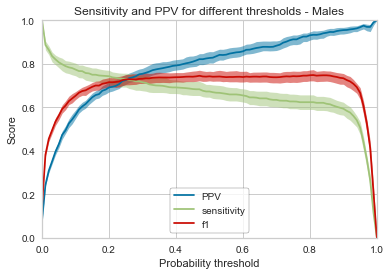

In [7]:
%matplotlib inline

# import libraries
import os
import pandas as pd
import numpy as np
import pickle
from joblib import dump, load
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.metrics import precision_recall_curve
import bisect 
from scipy.stats import mstats
import matplotlib.ticker as plticker

# specifying constant parameters
random_seed = 5

# set working directory
working_directory = r"C:\Users\oreler\Documents\Python_Local"
os.chdir(working_directory)

# code for uploading pickled data
MR_X_test_entire = pickle.load(open("Pure_data\MR_X_test_entire.pkl", 'rb'))
MR_Y_test_entire = pickle.load(open("Pure_data\MR_Y_test_entire.pkl", 'rb'))

# select features
MR_selected_features = ['Cluster\'s latitude coordinate', 'Current age', 'Cluster\'s longitude coordinate', 'Total lifetime number of sex partners', 'Age of most recent partner', 'Wealth index factor score combined', 'Years lived in place of residence', 'Condom used during last sex with most recent partner', 'Cluster altitude in meters']

MR_X_test_entire = MR_X_test_entire[MR_selected_features]
MR_Y_test_entire = pickle.load(open("Pure_data\MR_Y_test_entire.pkl", 'rb'))

MR_xgb_entire_pure_data = load("xgb_selected\MR_xgb_selected_9.joblib")

n_trials = 50 
plot_data = [] 

for i in range(n_trials):
    MR_X_test_boot, MR_Y_test_boot = resample(MR_X_test_entire,
                                              MR_Y_test_entire,
                                              random_state=i,
                                              stratify=MR_Y_test_entire)   
    predictions = MR_xgb_entire_pure_data.best_estimator_.predict_proba(MR_X_test_boot)[:,1]
    precision, recall, thresholds = precision_recall_curve(MR_Y_test_boot, predictions)
    f1 = 2*(precision*recall)/(precision+recall)
    thresholds = np.append(thresholds, 1) 
    queue_rate = [] 
    
    for threshold in thresholds: 
        queue_rate.append((predictions >= threshold).mean()) 

    plot_data.append({'thresholds': thresholds,
                      'precision': precision,
                      'recall': recall,
                      'f1': f1,
                      'queue_rate': queue_rate})

uniform_thresholds = np.linspace(0, 1, 101) 
uniform_precision_plots = [] 
uniform_recall_plots = []
uniform_f1_plots = [] 
uniform_queue_rate_plots = [] 

for p in plot_data: 
    uniform_precision = [] 
    uniform_recall = []
    uniform_f1 = [] 
    uniform_queue_rate = [] 
    for ut in uniform_thresholds: 
        index = bisect.bisect_left(p['thresholds'], ut) 
        uniform_precision.append(p['precision'][index]) 
        uniform_recall.append(p['recall'][index])
        uniform_f1.append(p['f1'][index]) 
        uniform_queue_rate.append(p['queue_rate'][index]) 
    uniform_precision_plots.append(uniform_precision)   
    uniform_recall_plots.append(uniform_recall)
    uniform_f1_plots.append(uniform_f1)
    uniform_queue_rate_plots.append(uniform_queue_rate)
quantiles = [0.05, 0.5, 0.95] 
lower_precision, median_precision, upper_precision = mstats.mquantiles(uniform_precision_plots, quantiles, axis=0) 
lower_recall, median_recall, upper_recall = mstats.mquantiles(uniform_recall_plots, quantiles, axis=0)
lower_f1, median_f1, upper_f1 = mstats.mquantiles(uniform_f1_plots, quantiles, axis=0)
lower_queue_rate, median_queue_rate, upper_queue_rate = mstats.mquantiles(uniform_queue_rate_plots, quantiles, axis=0) 
loc = plticker.MultipleLocator(base=0.1)
plt.plot(uniform_thresholds, median_precision) 
plt.plot(uniform_thresholds, median_recall) 
plt.plot(uniform_thresholds, median_f1)
#plt.plot(uniform_thresholds, median_queue_rate)
plt.fill_between(uniform_thresholds, upper_precision, lower_precision, alpha=0.5, linewidth=0, color=sns.color_palette()[0]) 
plt.fill_between(uniform_thresholds, upper_recall, lower_recall, alpha=0.5, linewidth=0, color=sns.color_palette()[1]) 
#plt.fill_between(uniform_thresholds, upper_queue_rate, lower_queue_rate, alpha=0.5, linewidth=0, color=sns.color_palette()[3])
plt.fill_between(uniform_thresholds, upper_f1, lower_f1, alpha=0.5, linewidth=0, color=sns.color_palette()[2])
leg = plt.legend(('PPV', 'sensitivity', 'f1'), frameon=True, loc='lower center') 
leg.get_frame().set_edgecolor('k') 
plt.xlabel('Probability threshold') 
plt.ylabel('Score')
plt.xlim(0, 1)
#plt.set_major_locator(ticker.MultipleLocator(0.1))
plt.ylim(0, 1)
plt.title('Sensitivity and PPV for different thresholds - Males')
plt.savefig('MR_PT-curve.png')

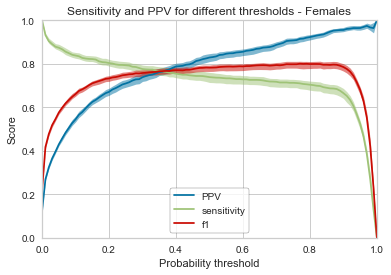

In [120]:
%matplotlib inline

# import libraries
import os
import pandas as pd
import numpy as np
import pickle
from joblib import dump, load
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.metrics import precision_recall_curve
import bisect 
from scipy.stats import mstats
import matplotlib.ticker as plticker

# specifying constant parameters
random_seed = 5

# set working directory
working_directory = r"C:\Users\oreler\Documents\Python_Local"
os.chdir(working_directory)

# code for uploading pickled data
MR_X_test_entire = pickle.load(open("Pure_data\IR_X_test_entire.pkl", 'rb'))
MR_Y_test_entire = pickle.load(open("Pure_data\IR_Y_test_entire.pkl", 'rb'))

# select features
MR_selected_features = ['Cluster\'s latitude coordinate', 'Current age', 'Cluster\'s longitude coordinate', 'Total lifetime number of sex partners', 'Age of most recent partner', 'Wealth index factor score combined', 'Years lived in place of residence', 'Condom used during last sex with most recent partner', 'Cluster altitude in meters']

MR_X_test_entire = MR_X_test_entire[MR_selected_features]

MR_xgb_entire_pure_data = load("xgb_selected\IR_xgb_selected_9.joblib")

n_trials = 50 
plot_data = [] 

for i in range(n_trials):
    MR_X_test_boot, MR_Y_test_boot = resample(MR_X_test_entire,
                                              MR_Y_test_entire,
                                              random_state=i,
                                              stratify=MR_Y_test_entire)   
    predictions = MR_xgb_entire_pure_data.best_estimator_.predict_proba(MR_X_test_boot)[:,1]
    precision, recall, thresholds = precision_recall_curve(MR_Y_test_boot, predictions)
    f1 = 2*(precision*recall)/(precision+recall)
    thresholds = np.append(thresholds, 1) 
    queue_rate = [] 
    
    for threshold in thresholds: 
        queue_rate.append((predictions >= threshold).mean()) 

    plot_data.append({'thresholds': thresholds,
                      'precision': precision,
                      'recall': recall,
                      'f1': f1,
                      'queue_rate': queue_rate})

uniform_thresholds = np.linspace(0, 1, 101) 
uniform_precision_plots = [] 
uniform_recall_plots = []
uniform_f1_plots = [] 
uniform_queue_rate_plots = [] 

for p in plot_data: 
    uniform_precision = [] 
    uniform_recall = []
    uniform_f1 = [] 
    uniform_queue_rate = [] 
    for ut in uniform_thresholds: 
        index = bisect.bisect_left(p['thresholds'], ut) 
        uniform_precision.append(p['precision'][index]) 
        uniform_recall.append(p['recall'][index])
        uniform_f1.append(p['f1'][index]) 
        uniform_queue_rate.append(p['queue_rate'][index]) 
    uniform_precision_plots.append(uniform_precision)   
    uniform_recall_plots.append(uniform_recall)
    uniform_f1_plots.append(uniform_f1)
    uniform_queue_rate_plots.append(uniform_queue_rate)
quantiles = [0.05, 0.5, 0.95] 
lower_precision, median_precision, upper_precision = mstats.mquantiles(uniform_precision_plots, quantiles, axis=0) 
lower_recall, median_recall, upper_recall = mstats.mquantiles(uniform_recall_plots, quantiles, axis=0)
lower_f1, median_f1, upper_f1 = mstats.mquantiles(uniform_f1_plots, quantiles, axis=0)
lower_queue_rate, median_queue_rate, upper_queue_rate = mstats.mquantiles(uniform_queue_rate_plots, quantiles, axis=0) 
loc = plticker.MultipleLocator(base=0.1)
plt.plot(uniform_thresholds, median_precision) 
plt.plot(uniform_thresholds, median_recall) 
plt.plot(uniform_thresholds, median_f1)
#plt.plot(uniform_thresholds, median_queue_rate)
plt.fill_between(uniform_thresholds, upper_precision, lower_precision, alpha=0.5, linewidth=0, color=sns.color_palette()[0]) 
plt.fill_between(uniform_thresholds, upper_recall, lower_recall, alpha=0.5, linewidth=0, color=sns.color_palette()[1]) 
#plt.fill_between(uniform_thresholds, upper_queue_rate, lower_queue_rate, alpha=0.5, linewidth=0, color=sns.color_palette()[3])
plt.fill_between(uniform_thresholds, upper_f1, lower_f1, alpha=0.5, linewidth=0, color=sns.color_palette()[2])
leg = plt.legend(('PPV', 'sensitivity', 'f1'), frameon=True, loc='lower center') 
leg.get_frame().set_edgecolor('k') 
plt.xlabel('Probability threshold') 
plt.ylabel('Score')
plt.xlim(0, 1)
#plt.set_major_locator(ticker.MultipleLocator(0.1))
plt.ylim(0, 1)
plt.title('Sensitivity and PPV for different thresholds - Females')
plt.savefig('IR_PT-curve.png')

In [94]:
%run -i "xgb_selected/xgb_10_unisex.py"

xgb_selected/xgb_10_unisex.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MR_X_train_selected['Sex'] = 0
xgb_selected/xgb_10_unisex.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IR_X_train_selected['Sex'] = 1


Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 35.8min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 73.0min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 123.9min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 194.6min
[Parallel(n_jobs=-1)]: Done 1250 out of 1250 | elapsed: 227.4min finished


xgb_selected/xgb_10_unisex.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  #================================================================================================================================
xgb_selected/xgb_10_unisex.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  #================================================================================================================================
xgb_selected/xgb_10_unisex.py:43: SettingWithCopyWarning: 
A value is trying to be set on a co

Confusion matrix on the train dataset: [[89875     2]
 [    0  9943]]
Average F1 score on the train sample 72.8%
CI F1 score on the train sample 1.2%
Average Sensitivity on the train sample 67.4%
CI Sensitivity on the train sample 1.7%
Average Positive Predictive Value on the train sample 79.0%
CI Positive Predictive Value on the train sample 1.2%
Parameters XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=10,
              min_child_weight=1, min_split_loss=0.4, missing=nan,
              n_estimators=210, n_jobs=1, nthread=1,
              objective='binary:logistic', random_state=5,
              reg_alpha=0.6000000000000001, reg_lambda=1.0, scale_pos_weight=4,
              seed=None, silent=None, subsample=1, verbosity=1)
Confusion matrix on the test dataset: [[22081   391]
 [  689  1796]]
F1 score on the test dataset: 76.9%
Sensitivity 

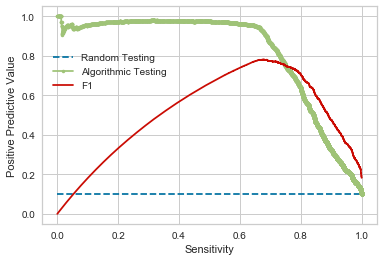

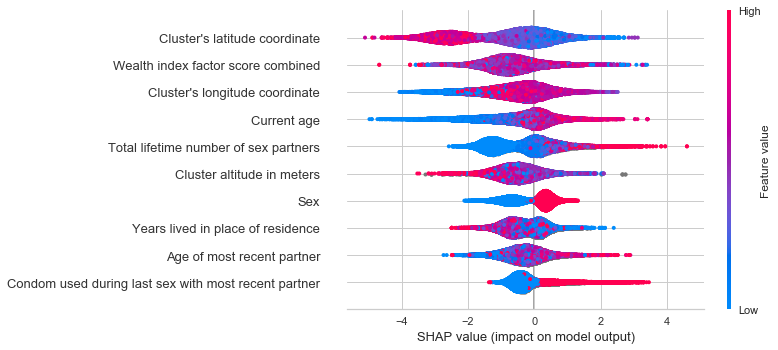

In [109]:
# import libraries
import os
import pandas as pd
import numpy as np
import pickle
from joblib import dump, load
import shap
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, precision_recall_curve, auc

# specifying constant parameters
random_seed = 5

# set working directory
working_directory = r"C:\Users\oreler\Documents\Python_Local"
os.chdir(working_directory)

# code for uploading pickled data
MR_X_train_entire = pickle.load(open("Pure_data\MR_X_train_entire.pkl", 'rb'))
MR_Y_train_entire = pickle.load(open("Pure_data\MR_Y_train_entire.pkl", 'rb'))
MR_X_test_entire = pickle.load(open("Pure_data\MR_X_test_entire.pkl", 'rb'))
MR_Y_test_entire = pickle.load(open("Pure_data\MR_Y_test_entire.pkl", 'rb'))

IR_X_train_entire = pickle.load(open("Pure_data\IR_X_train_entire.pkl", 'rb'))
IR_Y_train_entire = pickle.load(open("Pure_data\IR_Y_train_entire.pkl", 'rb'))
IR_X_test_entire = pickle.load(open("Pure_data\IR_X_test_entire.pkl", 'rb'))
IR_Y_test_entire = pickle.load(open("Pure_data\IR_Y_test_entire.pkl", 'rb'))

Y_train = pd.concat([MR_Y_train_entire, IR_Y_train_entire], join='inner', ignore_index=True)
Y_test = pd.concat([MR_Y_test_entire, IR_Y_test_entire], join='inner', ignore_index=True)

# select features
MR_selected_features = ['Cluster\'s latitude coordinate', 'Current age', 'Cluster\'s longitude coordinate', 'Total lifetime number of sex partners', 'Age of most recent partner', 'Wealth index factor score combined', 'Years lived in place of residence', 'Condom used during last sex with most recent partner', 'Cluster altitude in meters']

IR_selected_features = ['Cluster\'s latitude coordinate', 'Current age', 'Cluster\'s longitude coordinate', 'Total lifetime number of sex partners', 'Age of most recent partner', 'Wealth index factor score combined', 'Years lived in place of residence', 'Condom used during last sex with most recent partner', 'Cluster altitude in meters']

MR_X_train_selected = MR_X_train_entire[MR_selected_features]
MR_X_train_selected['Sex'] = 0
IR_X_train_selected = IR_X_train_entire[IR_selected_features]
IR_X_train_selected['Sex'] = 1

MR_X_test_selected = MR_X_test_entire[MR_selected_features]
MR_X_test_selected['Sex'] = 0
IR_X_test_selected = IR_X_test_entire[IR_selected_features]
IR_X_test_selected['Sex'] = 1

X_train_selected = pd.concat([MR_X_train_selected, IR_X_train_selected], join='inner', ignore_index=True)
X_test_selected = pd.concat([MR_X_test_selected, IR_X_test_selected], join='inner', ignore_index=True)

xgb_selected = load(r"xgb_selected\xgb_10_unisex.joblib")

best_index = xgb_10_unisex.best_index_

Y_train_selected_pred = xgb_selected.predict(X_train_selected)

print('Confusion matrix on the train dataset:', confusion_matrix(Y_train, Y_train_selected_pred))
print('Average F1 score on the train sample', "{:.1%}".format(xgb_selected.cv_results_['mean_test_f1'][MR_best_index]))
print('CI F1 score on the train sample', "{:.1%}".format(2*xgb_selected.cv_results_['std_test_f1'][MR_best_index]))
print('Average Sensitivity on the train sample', "{:.1%}".format(xgb_selected.cv_results_['mean_test_recall'][MR_best_index]))
print('CI Sensitivity on the train sample', "{:.1%}".format(2*xgb_selected.cv_results_['std_test_recall'][MR_best_index]))
print('Average Positive Predictive Value on the train sample', "{:.1%}".format(xgb_selected.cv_results_['mean_test_precision'][MR_best_index]))
print('CI Positive Predictive Value on the train sample', "{:.1%}".format(2*xgb_selected.cv_results_['std_test_precision'][MR_best_index]))
print('Parameters', xgb_selected.best_estimator_)
     
Y_test_selected_pred = xgb_selected.predict(X_test_selected)

print('Confusion matrix on the test dataset:', confusion_matrix(Y_test, Y_test_selected_pred))
print('F1 score on the test dataset:', "{:.1%}".format(f1_score(Y_test, Y_test_selected_pred)))
print('Sensitivity on the test dataset:', "{:.1%}".format(recall_score(Y_test, Y_test_selected_pred)))
print('Positive Predictive Value on the test dataset:', "{:.1%}".format(precision_score(Y_test, Y_test_selected_pred)))

def pr_f1_curve(model, dx_test, dy_test):
     dy_test_predict_proba = model.predict_proba(dx_test)[:,1]
     dy_test_predict = model.predict(dx_test)
     ppv_curve, sensitivity_curve, _ = precision_recall_curve(dy_test, dy_test_predict_proba)
     F1_score, AUC_score = f1_score(dy_test, dy_test_predict), auc(sensitivity_curve, ppv_curve)
     print(': F1 score = %.2f - Area under Curve = %.2f' % (F1_score, AUC_score))
     prevalence = np.sum(dy_test)/len(dy_test)
     pyplot.plot([0, 1], [prevalence, prevalence], linestyle='--', label='Random Testing')
     pyplot.plot(sensitivity_curve, ppv_curve, marker='.', label='Algorithmic Testing')
     pyplot.plot(sensitivity_curve, 2*(sensitivity_curve*ppv_curve)/(sensitivity_curve+ppv_curve), marker='', label='F1')
     pyplot.xlabel('Sensitivity')
     pyplot.ylabel('Positive Predictive Value')
     pyplot.legend(bbox_to_anchor=(0.4, 0.7))
     pyplot.show()

pr_f1_curve(xgb_selected, X_test_selected, Y_test)

# Explain model predictions using shapley value
explainer = shap.TreeExplainer(xgb_selected.best_estimator_)
shap_values = explainer.shap_values(X_train_selected)

# Plot summary_plot
shap.summary_plot(shap_values, X_train_selected)

Confusion matrix on the train dataset: [[40581     5]
 [    0  3534]]
Average F1 score on the train sample 73.7%
CI F1 score on the train sample 3.7%
Average Sensitivity on the train sample 67.9%
CI Sensitivity on the train sample 3.2%
Average Positive Predictive Value on the train sample 80.7%
CI Positive Predictive Value on the train sample 4.8%
Parameters XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=10,
              min_child_weight=4, min_split_loss=0.2, missing=nan,
              n_estimators=90, n_jobs=1, nthread=1, objective='binary:logistic',
              random_state=5, reg_alpha=0.1, reg_lambda=4.0, scale_pos_weight=4,
              seed=None, silent=None, subsample=1, verbosity=1)
Confusion matrix on the train dataset: [[49291     0]
 [    0  6409]]
Average F1 score on the train sample 75.6%
CI F1 score on the train sample 1.

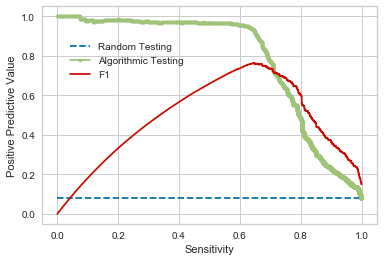

: F1 score = 0.80 - Area under Curve = 0.86


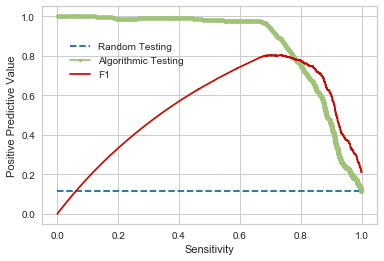

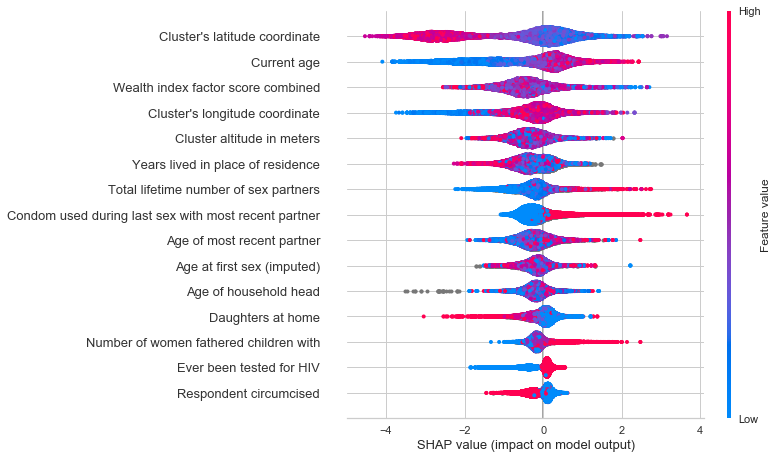

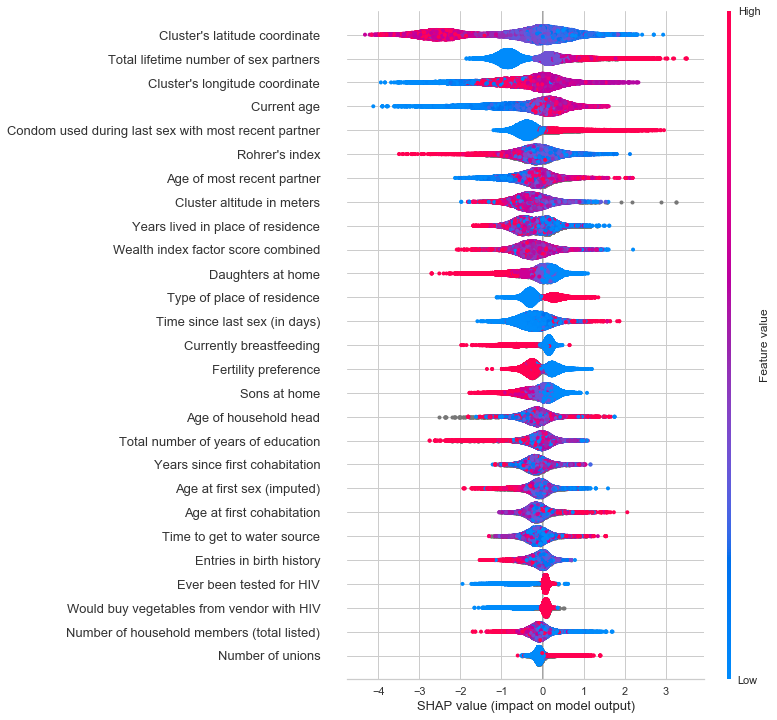

<Figure size 432x288 with 0 Axes>

In [110]:
%run -i "xgb_selected/xgb_15_27_pure_data_results.py"

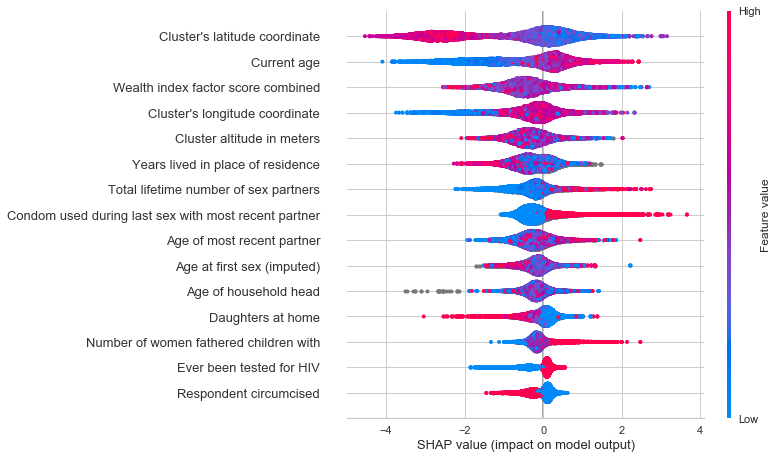

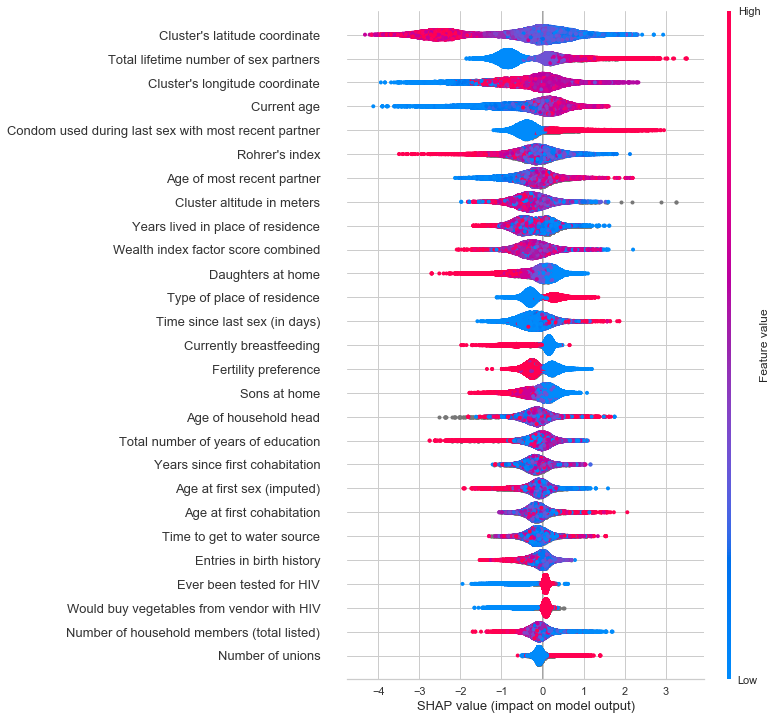

<Figure size 432x288 with 0 Axes>

In [115]:
# Plot summary_plot
shap.summary_plot(MR_shap_values, MR_X_train_selected_20, max_display=30)
plt.savefig('MR_Shapley.png', bbox_inches='tight')
shap.summary_plot(IR_shap_values, IR_X_train_selected_20, max_display=30)
plt.savefig('IR_Shapley.png', bbox_inches='tight')

In [3]:
%matplotlib widget